In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from tools import *

In [ ]:
def plot_tensor(tensor: torch.tensor):
    tensor = tensor.float().flatten().cpu().numpy()
    # Рисуем гистограмму
    plt.hist(tensor, bins=50, edgecolor='black')
    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_two_tensors(first_tensor: torch.tensor, first_tensor_name: str, second_tensor: torch.tensor, second_tensor_name: str):
    first_tensor = first_tensor.float().flatten().cpu().numpy()
    second_tensor = second_tensor.float().flatten().cpu().numpy()
    plt.figure(figsize=(8, 5))
    plt.hist(first_tensor, bins=50, alpha=0.3, label=first_tensor_name, color='blue')
    plt.hist(second_tensor, bins=50, alpha=0.3, label=second_tensor_name, color='red')
    plt.legend()
    plt.title("Histogram: {} vs {}".format(first_tensor_name, second_tensor_name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def set_seed(seed: int = 42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # если используешь GPU
    torch.cuda.manual_seed_all(seed)  # если у тебя несколько GPU
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


set_seed(seed=50) # for torch.bfloat16
m, n, k = 8, 1024, 256
dtype = torch.bfloat16
coeff = 1e-5
bit = 7

[INFO] Bitflip: original=8.046627044677734e-06, flipped=2.0116567611694336e-06


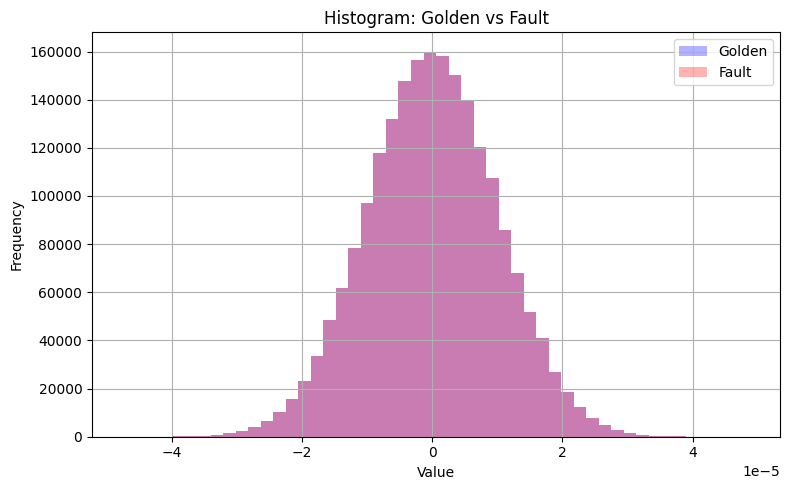

In [55]:
# source_tensor = (torch.randn(m, n, k) * coeff).abs().log().to(dtype)
source_tensor = (torch.randn(m, n, k) * coeff).to(dtype)

golden = source_tensor.clone()
bitflip_bf16(source_tensor, bit)

plot_two_tensors(golden, "Golden", source_tensor, "Fault")

In [56]:
x = torch.rand(2,2)
for item in x.flatten():
    print(item)

tensor(0.2658)
tensor(0.7216)
tensor(0.7094)
tensor(0.9588)


In [57]:
# # import torch
# # import matplotlib.pyplot as plt

# # k = 5
# # k = 31 - k
# # x = torch.arange(1e-6, 1e-4, 1e-6)
# # y = torch.zeros_like(x)

# # for i in range(x.numel()):
# #     y[i] = float_bitflip(x[i], k)

# # plt.plot(x, y)
# # plt.show()

# k = 3
# flipped = torch.tensor([0.0])
# original = flipped.clone()
# bitflip_bf16(flipped, k)
# print("[INFO] original = {}, flipped = {}".format(original.item(), flipped.item()))

In [58]:
# def approx_foo(tensor, degree, bit):
#     approx = torch.zeros_like(tensor)
#     a_k = torch.tensor([0.0])
#     bitflip_bf16(a_k, bit)
#     for i in range(degree):
#         approx += a_k * tensor.abs().log2().pow(i)
#     return approx

# bit = 2
# source_tensor = (torch.randn(m, n, k).to(torch.bfloat16) * coeff)
# golden = source_tensor.clone().abs().log2()
# approx = approx_foo(source_tensor, 2, bit)
# bitflip_bf16(source_tensor, bit)
# plot_two_tensors(golden, "golden", approx, "approx")



# # golden = source_tensor.clone()
# # bitflip_bf16(source_tensor, bit)

# # source_tensor = 2.0 + 2.0 * source_tensor.abs().log2() + 2.0 * source_tensor.abs().log2().pow(2) + 2.0 * source_tensor.abs().log2().pow(3)

# # plot_two_tensors(golden, "Golden", source_tensor, "Fault")